In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from Piplines import Models
import Piplines as PIP
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    MaxAbsScaler,
    OneHotEncoder,
    OrdinalEncoder,
    FunctionTransformer,
)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso

train = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/final_cleaned_datasets/train.csv",
)

test = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/final_cleaned_datasets/test.csv"
)
train.drop(columns="Unnamed: 0", inplace=True)
test.drop(columns="Unnamed: 0", inplace=True)

train

/tmp/ipykernel_84473/2123298038.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,house_area,quality,year_built,year_remodel_add,garage_year_build,number_of_bathrooms,basement_area,has_Fireplaces_or_not,TotRmsAbvGrd,grade_living_area,garage_area,garage_capacite,SalePrice
0,8450,7,2003,2003,2003,2,856,0,8,1710,548,2,208500
1,9600,6,1976,1976,1976,2,1262,1,6,1262,460,2,181500
2,11250,7,2001,2002,2001,2,920,1,6,1786,608,2,223500
3,9550,7,1915,1970,1998,1,756,1,7,1717,642,3,140000
4,14260,8,2000,2000,2000,2,1145,1,9,2198,836,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,7917,6,1999,2000,1999,2,953,1,7,1647,460,2,175000
1318,13175,6,1978,1988,1978,2,1542,2,7,2073,500,2,210000
1319,9042,7,1941,2006,1941,2,1152,2,9,2340,252,1,266500
1320,9717,5,1950,1996,1950,1,1078,0,5,1078,240,1,142125


In [2]:
test

,house_area,quality,year_built,year_remodel_add,garage_year_build,number_of_bathrooms,basement_area,has_Fireplaces_or_not,TotRmsAbvGrd,grade_living_area,garage_area,garage_capacite,SalePrice
0,11622,5,1961,1961,1961,1,882,0,5,896,730,1,169277
1,14267,6,1958,1958,1958,1,1329,0,6,1329,312,1,187758
2,13830,5,1997,1998,1997,2,928,1,6,1629,482,2,183583
3,9978,6,1998,1998,1998,2,926,1,7,1604,470,2,179317
4,5005,8,1992,1992,1992,2,1280,0,5,1280,506,2,150730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,4,1970,1970,1977,1,546,0,5,1092,0,0,167081
1455,1894,4,1970,1970,1970,1,546,0,6,1092,286,1,164788
1456,20000,5,1960,1996,1960,1,1224,1,7,1224,576,2,219222
1457,10441,5,1992,1992,1977,1,912,0,6,970,0,0,184924


In [3]:
x_train, x_test, y_train, y_test = train_test_split(
    train.drop("SalePrice", axis=1),
    train["SalePrice"],
    test_size=0.2,
    random_state=101,
)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [4]:
x_test

,house_area,quality,year_built,year_remodel_add,garage_year_build,number_of_bathrooms,basement_area,has_Fireplaces_or_not,TotRmsAbvGrd,grade_living_area,garage_area,garage_capacite
981,10574,8,2005,2006,2005,2,1082,1,9,1953,1043,3
446,10289,5,1965,1965,1965,1,1073,0,6,1073,515,2
874,10237,6,2005,2007,2005,2,783,1,8,1484,393,2
1282,11700,6,1968,1968,1968,2,708,1,7,1416,776,2
629,7577,6,2005,2006,2005,2,1362,1,6,1362,460,2
...,...,...,...,...,...,...,...,...,...,...,...,...
651,10542,7,1993,1994,1993,2,1311,1,9,2418,983,3
1124,8125,7,2005,2006,2005,2,756,0,6,1553,615,2
352,7200,6,1976,1976,1977,1,1041,1,6,1125,352,1
847,10083,7,2003,2003,2003,2,1176,0,5,1200,555,2


In [5]:
y_test

array([[252000],
       [156000],
       [178900],
       [179900],
       [194700],
       [148000],
       [127000],
       [184000],
       [139400],
       [192500],
       [168000],
       [ 66500],
       [147000],
       [261500],
       [170000],
       [294000],
       [137500],
       [220000],
       [153900],
       [216000],
       [112500],
       [277000],
       [145250],
       [246578],
       [132500],
       [227000],
       [163900],
       [139000],
       [130500],
       [152000],
       [102000],
       [244000],
       [200000],
       [266000],
       [360000],
       [187000],
       [104000],
       [270000],
       [128500],
       [114504],
       [269790],
       [228950],
       [309000],
       [128500],
       [190000],
       [239000],
       [250000],
       [147000],
       [228500],
       [319000],
       [149500],
       [208500],
       [244400],
       [320000],
       [156000],
       [264132],
       [175000],
       [369900],
       [259500

# Linear Regression


In [6]:
scaled_linear_model = Models.Linear_Scaled_model(x_train, y_train)

### scaled linear model


In [7]:
scaled_linear_model

LinearRegression()

In [8]:
# print("intercept = ", scaled_linear_model.intercept_)
# print()

# print("coef = ", scaled_linear_model.coef_)

In [9]:
x_train_preproc, y_train_preproc = PIP.preprocesse_scaled_linear_model(
    X=x_train, Y=y_train
)

x_test_preproc, y_test_preproc = PIP.preprocesse_scaled_linear_model(X=x_test, Y=y_test)


train_prediction = scaled_linear_model.predict(x_train_preproc)
test_prediction = scaled_linear_model.predict(x_test_preproc)

In [10]:
print(
    "Score Of Training Data = ",
    scaled_linear_model.score(x_train_preproc, y_train_preproc) * 100,
    "%",
)

print(
    "Score Of Testing Data = ",
    scaled_linear_model.score(x_test_preproc, y_test_preproc) * 100,
    "%",
)

Score Of Training Data =  82.90902243760117 %
Score Of Testing Data =  84.92568819249307 %


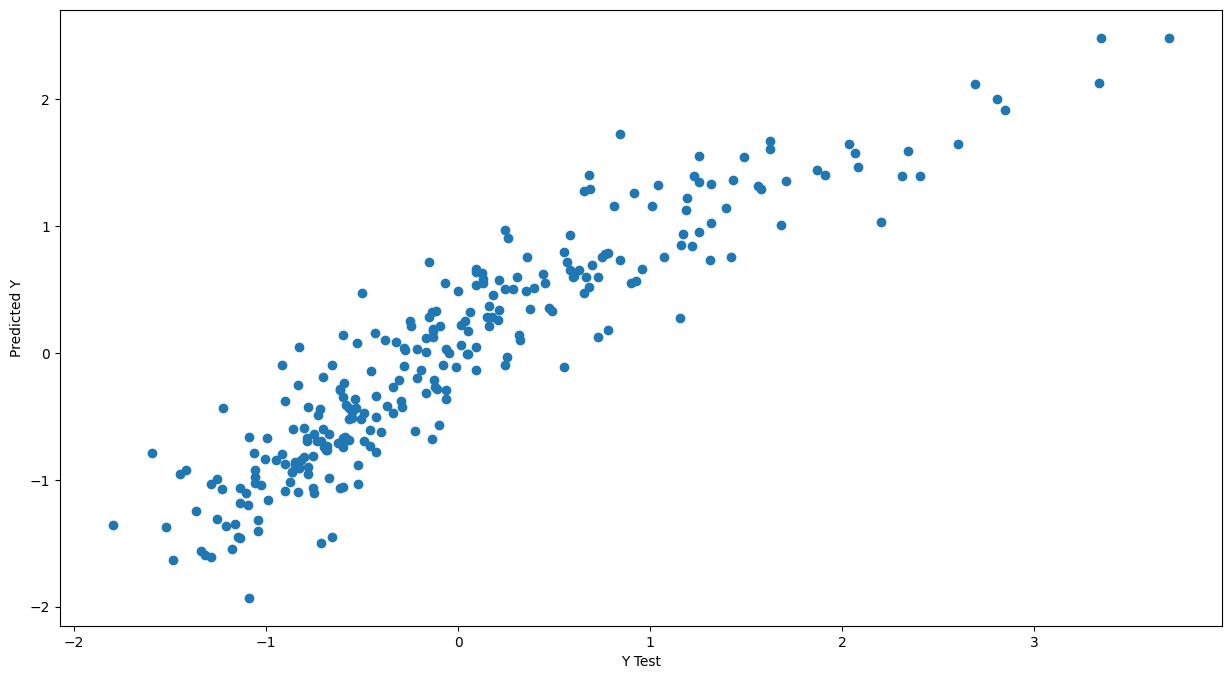

In [11]:
plt.figure(figsize=(15, 8))
plt.scatter(y_test_preproc, test_prediction)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

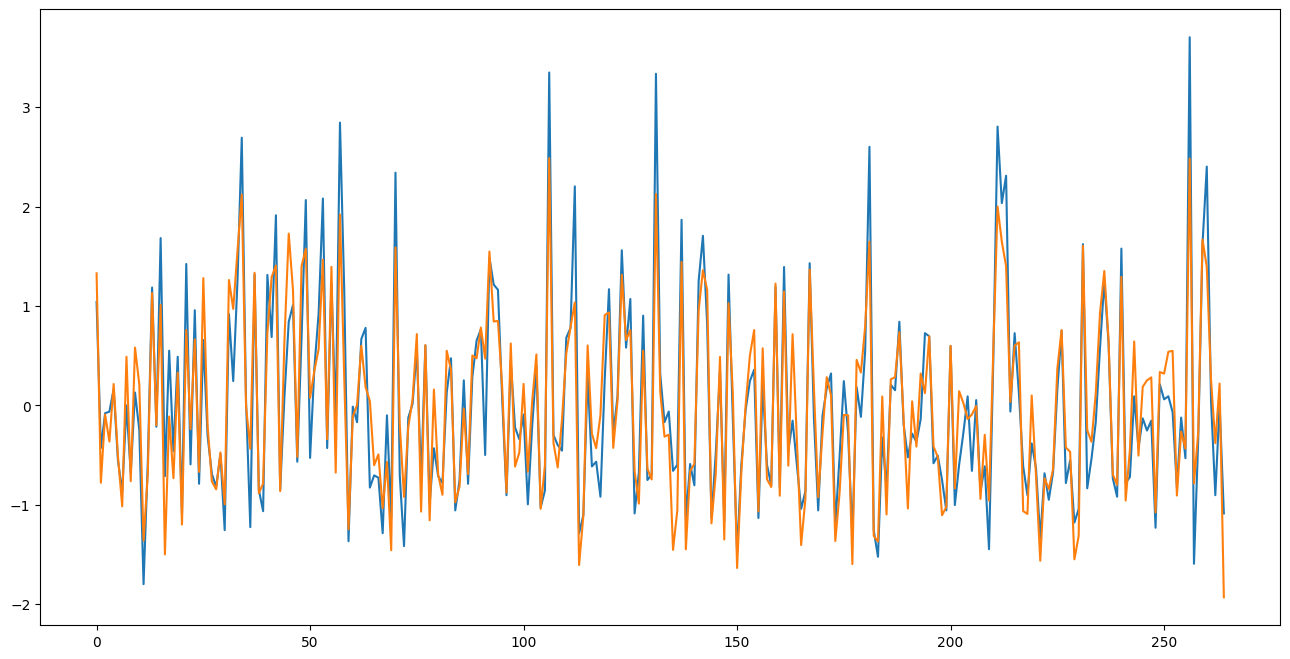

In [12]:
plt.figure(figsize=(16, 8))
plt.plot(y_test_preproc, label="Test")
plt.plot(test_prediction, label="predict")
plt.show()

In [13]:
print("MAE:", mean_absolute_error(y_test_preproc, test_prediction))
print("MSE:", mean_squared_error(y_test_preproc, test_prediction))
print("RMSE:", np.sqrt(mean_squared_error(y_test_preproc, test_prediction)))

MAE: 0.29291992564306873
MSE: 0.15074311807506935
RMSE: 0.3882565106666846
